<a href="https://colab.research.google.com/github/sanjeetarya001/TimeSeriesDatasets/blob/main/demand_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
test_file=pd.read_csv('https://github.com/sanjeetarya001/TimeSeriesdata/raw/main/test.csv')
train_file=pd.read_csv('https://github.com/sanjeetarya001/TimeSeriesdata/raw/main/train.csv')
meal_file=pd.read_csv('https://github.com/sanjeetarya001/TimeSeriesdata/raw/main/meal_info.csv')
fullfilment_file=pd.read_csv('https://github.com/sanjeetarya001/TimeSeriesdata/raw/main/fulfilment_center_info.csv')

In [ ]:
df= train_file.copy()

In [ ]:
fullfilment_file

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [ ]:
meal_file

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [ ]:
# df[['center_id','meal_id']].drop_duplicates()

In [ ]:
# df[(df['center_id'] ==66) & (df["meal_id"] == 3111)]

In [ ]:
group_meal_center = df.groupby(by =["center_id","meal_id"])

In [ ]:
meal_id = meal_file['meal_id']
len(meal_id)

51

In [ ]:
center_id = fullfilment_file['center_id']
len(center_id)

77

## Testing

In [ ]:
test1 = group_meal_center.get_group((center_id[11],1902))

### Data Details

In [ ]:
test1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
11474,1031457,4,86,1902,398.67,446.23,0,0,68
14330,1172567,5,86,1902,445.23,446.23,0,0,15
17179,1126705,6,86,1902,445.23,445.23,0,0,15
19972,1451045,7,86,1902,447.23,445.23,0,0,26
31335,1177976,11,86,1902,445.23,445.23,0,0,26


In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 11474 to 456396
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     53 non-null     int64  
 1   week                   53 non-null     int64  
 2   center_id              53 non-null     int64  
 3   meal_id                53 non-null     int64  
 4   checkout_price         53 non-null     float64
 5   base_price             53 non-null     float64
 6   emailer_for_promotion  53 non-null     int64  
 7   homepage_featured      53 non-null     int64  
 8   num_orders             53 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 4.1 KB


In [ ]:
test2= test1[['week','num_orders']]

In [ ]:
test2.set_index(keys='week', drop=True,inplace=True)

In [ ]:
test2

,num_orders
week,
4,68
5,15
6,15
7,26
11,26
12,28
13,13
20,15
21,14


In [ ]:
add_indices = pd.Index(range(1,146)).difference(test2.index)

add_df = pd.DataFrame(index=add_indices, columns=test2.columns).fillna(np.nan)

test3 = pd.concat([test2, add_df])

In [ ]:
test3.sort_index(ascending=True,inplace=True)

In [ ]:
test3

,num_orders
1,NaN
2,NaN
3,NaN
4,68.0
5,15.0
...,...
141,15.0
142,NaN
143,NaN
144,15.0


###ADI and CV2

In [ ]:
# # Forecast accuracy strongly depends upon the product forcastability. To determine this,we apply two coefficients:
# # Average Demand Interval (ADI)- it measures the demand regularity in time by computing the average inerval between two demands.
# # Square of Coefficient of variation(CV^2)- it measures the variation in quantities.
# # Based on these 2 dimensions, we can classify demand profiles into 4 categories:

# # a) Smooth demand (ADI < 1.32 and CV² < 0.49)-
# The demand is regular in time and in quantity. It is therefore easy to forecast with a low forecasting error level.

# # b) Intermittent demand (ADI >= 1.32 and CV² < 0.49)-
# The demand history shows very little variation in demand quantity but a high variation in the interval between two demands.
# Though specific forecasting methods tackle intermittent demands, the forecast error margin is higher.

# # c) Erratic demand (ADI < 1.32 and CV² >= 0.49)-
# The demand has regular occurrences in time with high quantity variations. The forecast accuracy remains shaky.

# # d) Lumpy demand (ADI >= 1.32 and CV² >= 0.49).
# The demand is characterized by a large variation both in quantity and time.
# It is actually impossible to produce a reliable forecast, no matter which forecasting tools we use.


In [ ]:
ADI = 145/len(test1[test1.num_orders != 0])
## Calculating CV_squared
cv = (test1.num_orders.std()/test1.num_orders.mean())**2

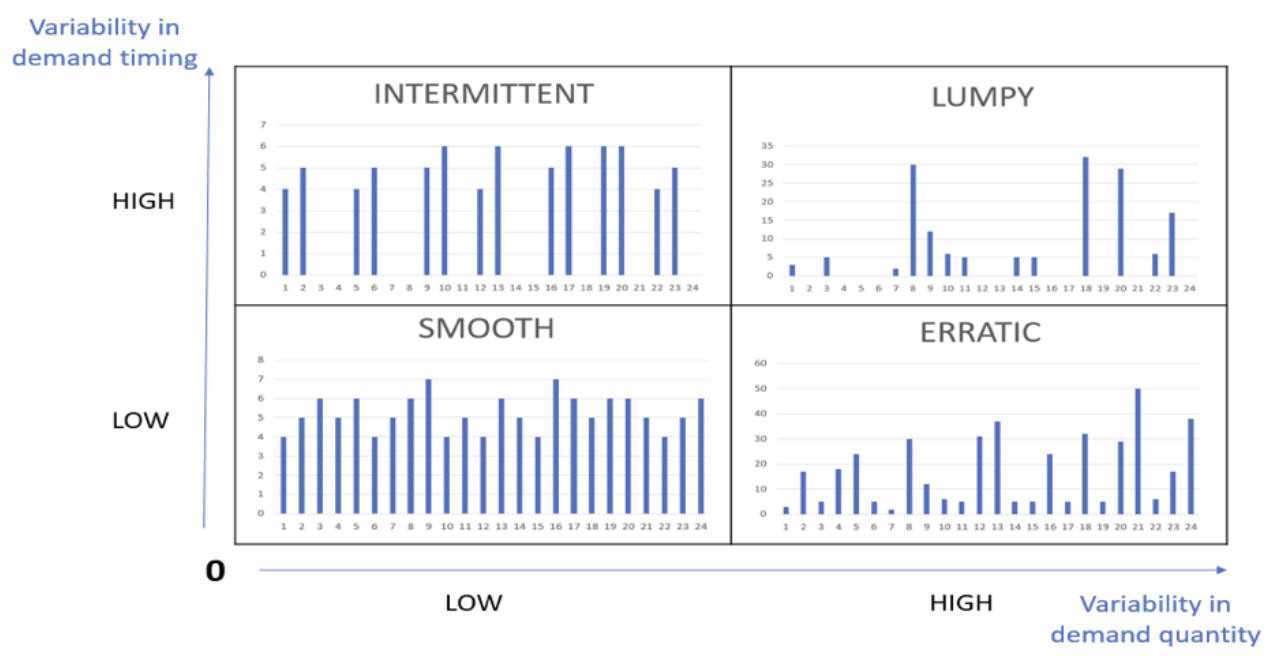

In [ ]:
## Defining a fuction for categorization
def Bucket(adi,cv):
    if((adi<=1.32) & (cv<=0.49)):
        a='Smooth'
    elif((adi>=1.32) & (cv>=0.49)):
        a='Lumpy'
    elif((adi<1.32) & (cv>0.49)):
        a='Erratic'
    else:
        a='Intermittent'
    return a

### Result

In [ ]:
fig = px.bar(test1,x=test1.week, y=test1.num_orders,title=Bucket(ADI,cv))
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Time series Bucket

In [ ]:
c_id = []
m_id = []
series_type = []

for i in range(len(center_id)):
  for j in range(len(meal_id)):
    try:
        test1 = group_meal_center.get_group((center_id[i],meal_id[j]))
        ADI = 145/len(test1[test1.num_orders != 0])
        ## Calculating CV_squared
        cv = (test1.num_orders.std()/test1.num_orders.mean())**2
        b = Bucket(ADI,cv)
        c_id.append(center_id[i])
        m_id.append(meal_id[j])
        series_type.append(b)
    except:
        c_id.append(center_id[i])
        m_id.append(meal_id[j])
        series_type.append("No Demand")

# Define a dictionary containing data
data = {'Center_id': c_id,
        'Meal_id': m_id,
        'Series_Type': series_type}

In [ ]:
series_frame = pd.DataFrame(data)
# series_frame[series_frame.Series_Type == 'No Demand']

In [ ]:
import plotly.graph_objects as go
xx = series_frame.Series_Type.value_counts()
fig = go.Figure([go.Bar(x=xx.index , y=xx.values,text=xx.values,textposition='auto')])
fig.show()

In [ ]:
series_frame[series_frame.Series_Type == 'Intermittent']

,Center_id,Meal_id,Series_Type
36,11,1902,Intermittent
37,11,1247,Intermittent
40,11,1770,Intermittent
45,11,1571,Intermittent
46,11,2956,Intermittent
...,...,...,...
3861,68,1902,Intermittent
3865,68,1770,Intermittent
3871,68,2956,Intermittent
3872,68,2104,Intermittent


##Adding missing rows with np.nan

In [ ]:
Smooth_dic = {}
Erratic_dic = {}
Intermittent_dic = {}
Lumpy_dic = {}

for s_type in ['Smooth','Erratic','Intermittent','Lumpy']:
  xx = series_frame[series_frame.Series_Type == s_type]
  x_dic = {}
  for ind in xx.index:
    test1 = group_meal_center.get_group((xx['Center_id'][ind],xx['Meal_id'][ind]))
    test2= test1[['week','num_orders']]
    test2.set_index(keys='week', drop=True,inplace=True)
    add_indices = pd.Index(range(1,146)).difference(test2.index)
    add_df = pd.DataFrame(index=add_indices, columns=test2.columns).fillna(np.nan)
    test3 = pd.concat([test2, add_df])
    test3.sort_index(ascending=True,inplace=True)
    x_dic[f"{xx['Center_id'][ind]}_{xx['Meal_id'][ind]}"] = test3

  globals()[f"{s_type}_dic"] = x_dic


In [ ]:
Smooth_dic['102_1778']

##Sample Run

In [ ]:
%%capture
!pip install darts

In [ ]:
import numpy as np
from darts import TimeSeries
from darts.dataprocessing.transformers import MissingValuesFiller


In [ ]:
series = TimeSeries.from_series(Smooth_dic['101_1311']['num_orders'])
transformer = MissingValuesFiller()
series_filled = transformer.transform(series)

In [ ]:
# series_filled.pd_dataframe().head(20)
# series.pd_dataframe().head(20)
# series_filled.pd_dataframe().compare(series.pd_dataframe())

In [ ]:
from darts.models import Croston ,NBEATSModel
from darts.dataprocessing.transformers import Scaler

In [ ]:
scalert= Scaler()
s = scalert.fit_transform(series_filled)

In [ ]:
lr_model = NBEATSModel(input_chunk_length=7,output_chunk_length=1)
lr_model.fit(s[:100])

In [ ]:
s_pred= lr_model.predict(46)

In [ ]:
s[100:].plot()
s_pred.plot()

##Feature Engineering

In [ ]:
#flags
#national holidays (country, state , sunday include or not)

#weature forecasting mainly temperature,rain,wind (Location needed)

#time dependence
#time step - time dummy(0,1,2,3,4,...total_lenght)
#indicators - one -hot coding of week{mon,tues,weds,thru,fri,sat,sun}
#seasonality - daily ,weekly, monthly , biannually ,annually -- Additive or Mulitplicative
#fourier features. -- to capture seasonality contain many observations
#periodogram

#serial dependence
#lag features - lag1 ,lag2....lag_n
# lag --> target , seasonal lags , other target series lags,lags of exogeneous features(distributed lags)
#acf and Pacf plots

#The method of using predictions as features is known as "stacking
# create features using univariate models

# window features --> rolling mean and std of 3 days , weeks, months

# static features

##Using Darts

In [ ]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [ ]:
y_all = TimeSeries.from_group_dataframe( df,
                                        group_cols=['center_id','meal_id'],
                                        time_col ='week',
                                        value_cols = ['num_orders'],
                                        freq=1,
                                        fill_missing_dates=True
                                      )

In [ ]:
int(y_all[0].static_covariates['center_id'].values). #.item()

10

In [ ]:
int(y_all[0].static_covariates['meal_id'].values)

1062

In [ ]:
# check attributes of the time series
print("components:", y_all[0].components)
print("duration:",y_all[0].duration)
print("frequency:",y_all[0].freq)
print("frequency:",y_all[0].freq_str)
print("has date time index? (or else, it must have an integer index):",y_all[0].has_datetime_index)
print("deterministic:",y_all[0].is_deterministic)
print("univariate:",y_all[0].is_univariate)

components: Index(['num_orders'], dtype='object', name='component')
duration: 144
frequency: 1
frequency: None
has date time index? (or else, it must have an integer index): False
deterministic: True
univariate: True
